<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
   
                                          
                                          
                                          
                                          
                                          
#                                        Build and Evaluate Unsupervised Learning Models




#                                                        Gladys Murage

#                              College of Business, Engineering, and  Technology, National University

#                                         DDS8555 v1: PREDICTIVE ANALYSIS(3602869492)

#                                                        Dr MOHAMED NABEEL

#                                                           April 27, 2025


<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>

# Import and Load Libraries

In [4]:
# Import and load libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Load data
df = pd.read_csv('wine-clustering.csv')

# Read the top 5 records
print(df.head())

# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45    

# Perform Principle Component Analysis (PCA) and retain 80% variance.

Number of components for 80% variance: 5


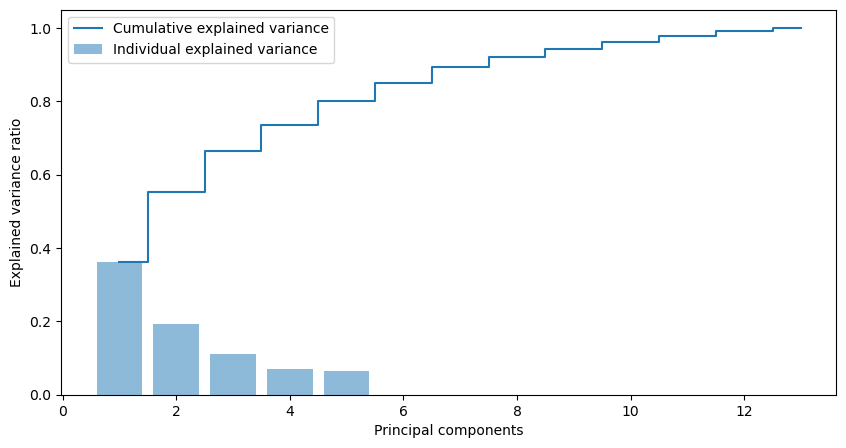

In [5]:
# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Find number of components for 80% variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.8) + 1
print(f"Number of components for 80% variance: {n_components}")

# Re-fit PCA with selected components
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=principal_components, 
                      columns=[f'PC{i+1}' for i in range(n_components)])

# Plot explained variance
plt.figure(figsize=(10,5))
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, 
        alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1,len(cumulative_variance)+1), cumulative_variance, 
         where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.savefig('PCA_80%_Variance.png', dpi=300,bbox_inches= "tight")
plt.show()

# Interpretation of PCA Results
The plots is  a visualization of Principal Component Analysis (PCA) results, specifically showing the explained variance ratio for each principal component and the cumulative explained variance. The interpretation of the PCA plot  is as follows"

## Key Elements:
#### Y-axis (0.0 to 1.0):
Represents the explained variance ratio which is the proportion of variance explained by each principal component or cumulatively.

#### X-axis: 
This represents the principal components PC1, PC2 and so forth.

#### Individual explained variance bars: 
Each bar shows the variance explained by a single principal component. For example PC1 explains the most variance, followed by PC2 and so forth.

#### Cumulative explained variance line:
The line shows how much variance is explained as more principal components are added. The first few components help explain most of the variance.

## Observations:
1. The first few principal components explain the majority of the variance as shown by a steep initial slope in the cumulative line.

2. Around 80% of the total variance is explained by the first few components as indicated by the label "0.8" at the corresponding 4th principal component bar.

3. The remaining components contribute minimally to the explained variance as shown by flattening of the cumulative line.

## Implications:
1. Dimensionality reduction is effective since only a small number of principal components 1-5 retain most of the information which is 80% variance.

 2. This means that further components may be dropped to simplify the model without significant loss of information.

# K=4 Clusters

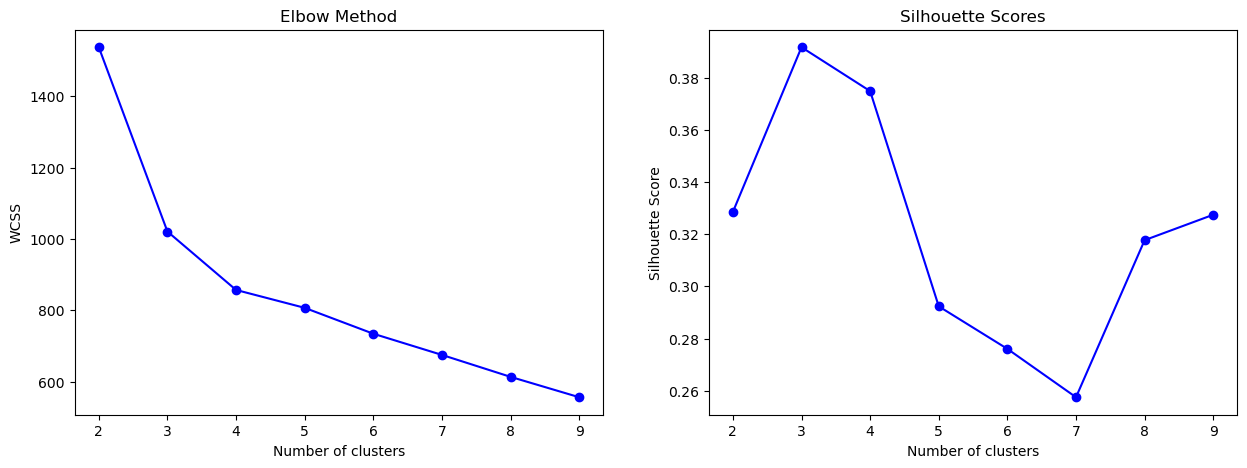

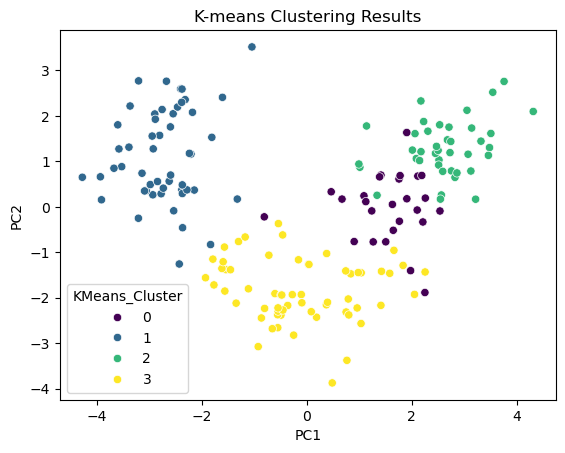

In [17]:
# Elbow method and silhouette analysis
wcss = []
silhouette_scores = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_df, kmeans.labels_))

# Plot results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.plot(k_range, wcss, 'bo-')
ax1.set_title('Elbow Method')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('WCSS')

ax2.plot(k_range, silhouette_scores, 'bo-')
ax2.set_title('Silhouette Scores')
ax2.set_xlabel('Number of clusters')
ax2.set_ylabel('Silhouette Score')
plt.show()

# Fit optimal K (choose based on plots)
optimal_k = 4  # Change based on your analysis
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters_kmeans = final_kmeans.fit_predict(pca_df)

# Add clusters to PCA dataframe
pca_df['KMeans_Cluster'] = clusters_kmeans

# Visualize clusters
sns.scatterplot(x='PC1', y='PC2', hue='KMeans_Cluster', data=pca_df, palette='viridis')
plt.title('K-means Clustering Results')
plt.show()

# K-means Clustering with Different K Values
K=3

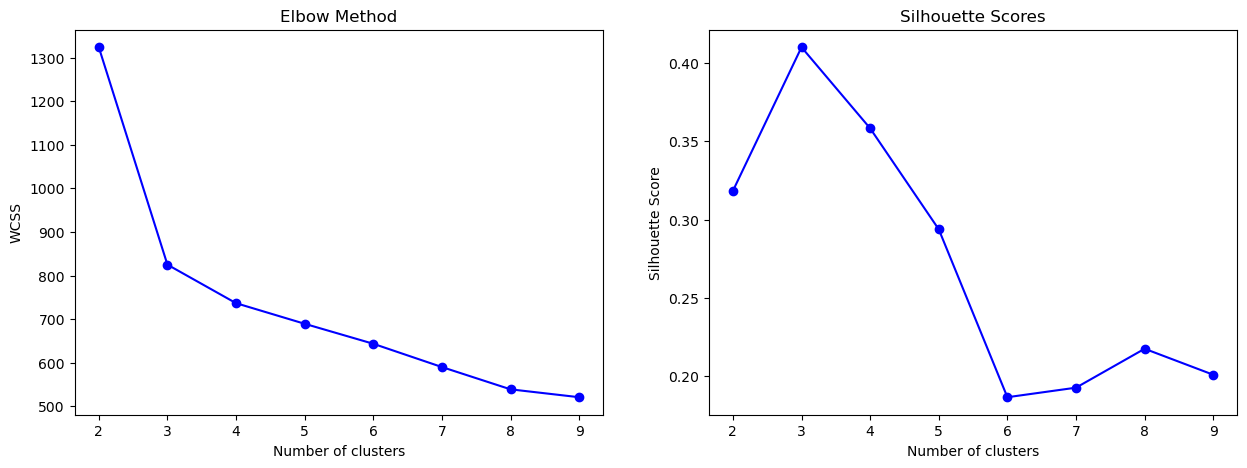

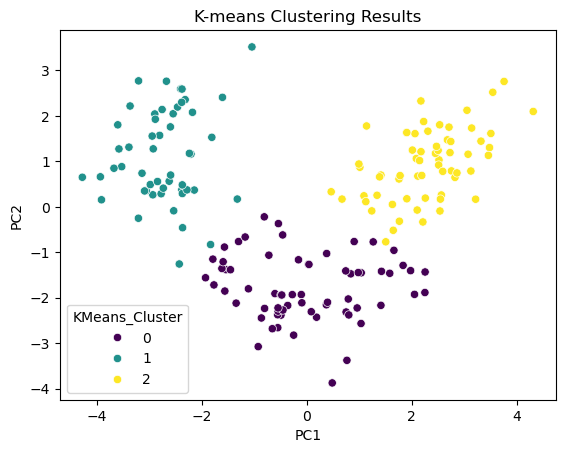

In [9]:
# Elbow method and silhouette analysis
wcss = []
silhouette_scores = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_df, kmeans.labels_))

# Plot results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.plot(k_range, wcss, 'bo-')
ax1.set_title('Elbow Method')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('WCSS')
plt.savefig('Elbow_method.png', dpi=300, bbox_inches = 'tight')

            
ax2.plot(k_range, silhouette_scores, 'bo-')
ax2.set_title('Silhouette Scores')
ax2.set_xlabel('Number of clusters')
ax2.set_ylabel('Silhouette Score')
plt.savefig('Silhouette_scores.png', dpi=300, bbox_inches = 'tight')
plt.show()

# Fit optimal K (choose based on plots)
optimal_k = 3  # Change based on your analysis
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters_kmeans = final_kmeans.fit_predict(pca_df)

# Add clusters to PCA dataframe
pca_df['KMeans_Cluster'] = clusters_kmeans

# Visualize clusters
sns.scatterplot(x='PC1', y='PC2', hue='KMeans_Cluster', data=pca_df, palette='viridis')
plt.title('K-means Clustering Results')
plt.savefig('K-means_clustering_results.png', dpi=300, bbox_inches = 'tight')
plt.show()

# Interpretation of K Means Clustering 
These two graphs illustrate methods for determining the optimal number of clusters in the wine dataset:
### Elbow Method (left graph):
It plots the Within-Cluster Sum of Squares (WCSS) against the number of clusters. The WCSS decreases sharply from 2 to 3 clusters and then levels off more gradually, forming an “elbow” at 3 clusters.
This suggests that 3 clusters provide a good balance between reducing intra-cluster variance without overcomplicating the model.

### Silhouette Scores (right graph): 
This method evaluates the quality of clustering using the Silhouette Score, which measures how well-separated the clusters are. 
The score peaks at around 0.42 when the number of clusters is 3, indicating that this configuration offers the best separation.

### Rationale:
Both methods independently suggest that 3 clusters might be the ideal number for structuring the wine dataset. 

## The plot visualizes the results of a K-means clustering algorithm applied to the wine dataset using Principal Component Analysis (PCA). 
The key interpretation are as follows:

### Clusters Identified =3 :
The wine dataset has been partitioned into three distinct clusters, each represented by different colors :purple, teal, and yellow.
These clusters indicate groups of data points that are most similar to each other based on their features.

### Axes (PC1 & PC2): 
These represent the first two principal components from PCA, reducing the dimensionality of the wine dataset while retaining most of its variance at 80%. 
This transformation allows for a clear visualization of cluster separation.

### Cluster Structure: 
The clusters appear well-separated, suggesting that K-means successfully identified meaningful groupings. 
However, some slight overlap may indicate areas where clustering boundaries are not perfectly distinct.

### Conclusions
This plot of clusters aligns with the Elbow Method and Silhouette Score findings, confirming that 3 clusters is an optimal choice.
It reinforces that the approach is well-tuned and appropriate. 

### Further implications 
To have additional validations, further clustering with hierarchical clustering will be performed for comparison.

# Hierarchical Clustering

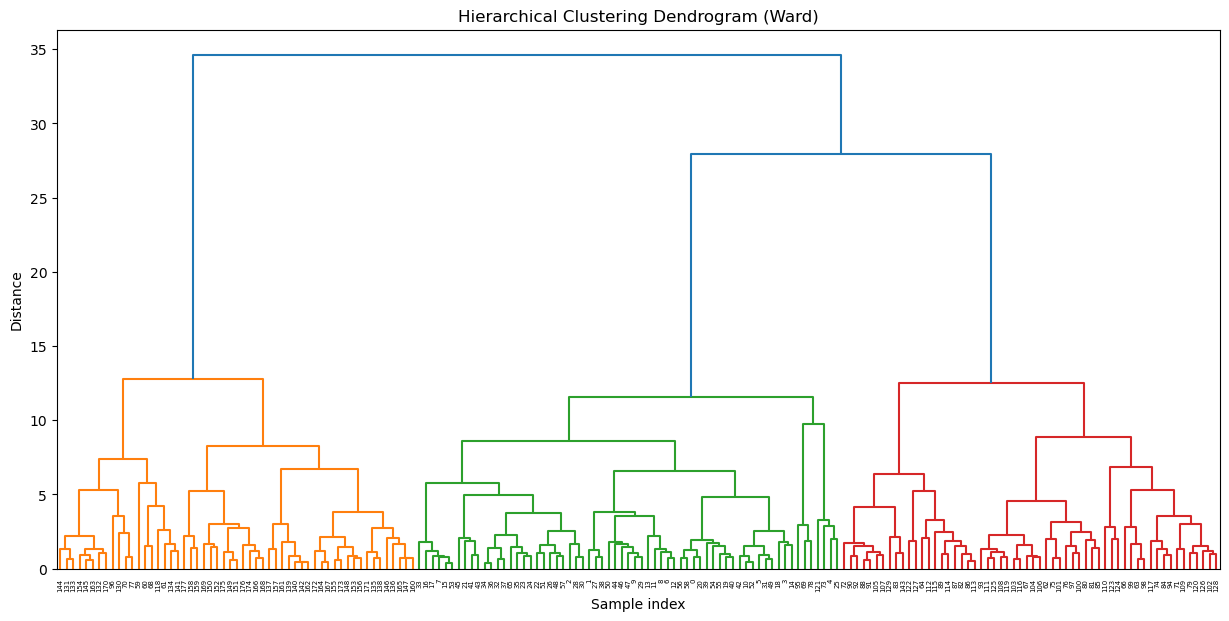

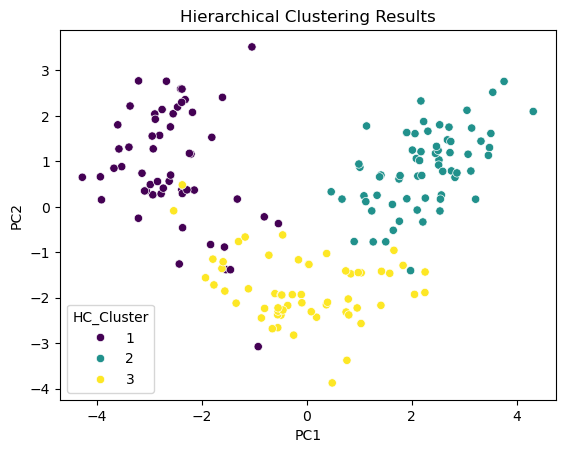

In [15]:
# Perform hierarchical clustering
plt.figure(figsize=(15, 7))
dend = dendrogram(linkage(pca_df.iloc[:,:n_components], method='ward'))
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.savefig('Hierarchical_Clustering_Dendrogram.png', dpi=300, bbox_inches = 'tight')
plt.show()

# Cut dendrogram to get clusters
n_clusters = 3  # Match with K-means for comparison
hc_clusters = fcluster(linkage(pca_df.iloc[:,:n_components], method='ward'), 
                      t=n_clusters, criterion='maxclust')
pca_df['HC_Cluster'] = hc_clusters

# Visualize hierarchical clusters
sns.scatterplot(x='PC1', y='PC2', hue='HC_Cluster', data=pca_df, palette='viridis')
plt.title('Hierarchical Clustering Results')
plt.savefig('Hierarchical_clustering_results.png', dpi=300, bbox_inches = 'tight')
plt.show()

# Hierarchical Clustering Results interpreted 
This is a Hierarchical Clustering Dendrogram using the Ward method, which is useful for determining the natural grouping of data points. The interpretations are as follows:

### Dendrogram Structure: 
The branching hierarchy illustrates how clusters are merged as the algorithm progresses. The x-axis represents individual sample indices, while the y-axis represents the distance at which clusters are joined. 
The higher the connection point, the more dissimilar the merged clusters are.

### Three Main Clusters: 
The wine dataset has been divided into three groups, marked by orange, green, and red sections, reinforcing previous findings from K-means clustering and silhouette analysis.

### Ward Method: 
This technique minimizes the variance within clusters, making it particularly useful for structured datasets.

### Conclusions: 
Since previously above the  K-means clustering also suggested three clusters, this dendrogram validates that three is a meaningful choice in the wine data clustering.

# The scatter plot visualizes the Hierarchical Clustering Results using Principal Component Analysis (PCA):

### Cluster Separation:
The data has been grouped into three distinct clusters, represented by purple, teal, and yellow dots. 
This aligns with the findings from K-means clustering and the dendrogram analysis, reinforcing that three clusters provide an optimal structure.

### Axes Representation: 
The x-axis (PC1) and y-axis (PC2) correspond to the first two principal components, reducing the dataset’s dimensionality while preserving variance at 80%. 
This allows for a clear visualization of cluster separation.

### Hierarchical Clustering Performance:
The clusters are well-defined, with minimal overlap, suggesting that hierarchical clustering effectively captured meaningful relationships between data points.
Since this supports the earlier insights from the  dendrogram analysis, it's a strong validation of the  clustering approach of using 3 K-means clusters versus 4! 

In [19]:
# Compare K-means and hierarchical clustering
comparison = pd.crosstab(pca_df['KMeans_Cluster'], pca_df['HC_Cluster'], 
                        rownames=['K-means'], colnames=['Hierarchical'])
print("Cluster Assignment Comparison:")
print(comparison)

Cluster Assignment Comparison:
Hierarchical   1   2   3
K-means                 
0              5   0  55
1             50   0   2
2              0  65   1


# Compare Clustering Results between K-Means and Hierarchical clustering
## Interpretation of the cluster assignment comparison
This cross-tabulation compares the K-means clustering results (rows) with the hierarchical clustering results (columns).
Each cell shows how many observations were assigned to a given cluster in K-means (0, 1, 2) vs. hierarchical clustering (1, 2, 3).

## Key observations:
### K-means Cluster 0 vs. Hierarchical Clusters:
1. Mostly aligns with Hierarchical Cluster 3 (55 out of 60).
2. 5 observations were assigned to Hierarchical Cluster 1 instead.
#### Interpretation: 
K-means Cluster 0 strongly corresponds to Hierarchical Cluster 3, with minor mismatch of approximately 8% .

### K-means Cluster 1 vs. Hierarchical Clusters:
1. Mostly aligns with Hierarchical Cluster 1 (50 out of 52).
2.  2 observations were assigned to Hierarchical Cluster 3.
#### Interpretation: 
K-means Cluster 1 strongly corresponds to Hierarchical Cluster 1, with very little mismatch of approximately 4%.

### K-means Cluster 2 vs. Hierarchical Clusters:
1. Almost perfectly aligns with Hierarchical Cluster 2 (65 out of 66).
2. Only 1 observation was assigned to Hierarchical Cluster 3.
#### Interpretation:
K-means Cluster 2 is nearly identical to Hierarchical Cluster 2 with an approximate 1.5% mismatch.

## Overall comparison  between methods:
####  High Consistency:
Both methods largely are in agreement  on cluster assignments.

#### Discrepancies:
1. 5 cases where K-means Cluster 0 was assigned to Hierarchical Cluster 1.
2. 2 cases where K-means Cluster 1 was assigned to Hierarchical Cluster 3.
3.  1 case where K-means Cluster 2 was assigned to Hierarchical Cluster 3.

## Possible Reasons for Mismatches:
#### Different Algorithms:
K-means is centroid-based, while hierarchical clustering is linkage-based and in ithis case used  Ward’s method.

#### Boundary Cases: 
Some observations may lie near cluster boundaries, leading to different assignments.

## Conclusions:
#### Both methods identify similar structures in the data, suggesting robust clustering.
K-means Cluster 0 = Hierarchical Cluster 3
-means Cluster 1 = Hierarchical Cluster 1
K-means Cluster 2 = Hierarchical Cluster 2

#### Minor disagreements likely represent ambiguous cases that could be further analyzed.

## Recommendation:
1. If using these clusters for decision-making, it warrants furthers checks to establish if  mismatched observations have unique characteristics in the wine data.
Consider visualizing these observations in PCA space to see if they fall between clusters.

## Next Steps for Deeper Analysis:
#### Examine misclassified observations: 
Are they outliers or borderline cases?
#### Check feature distributions for each cluster to understand their differences.
#### Validate with domain knowledge 
For example do clusters correspond to known wine types?.

##### This comparison shows that both clustering methods largely agree, supporting the validity of the identified clusters. The small discrepancies could be due to algorithmic differences or natural overlaps in the data.

# Investigate Assumptions

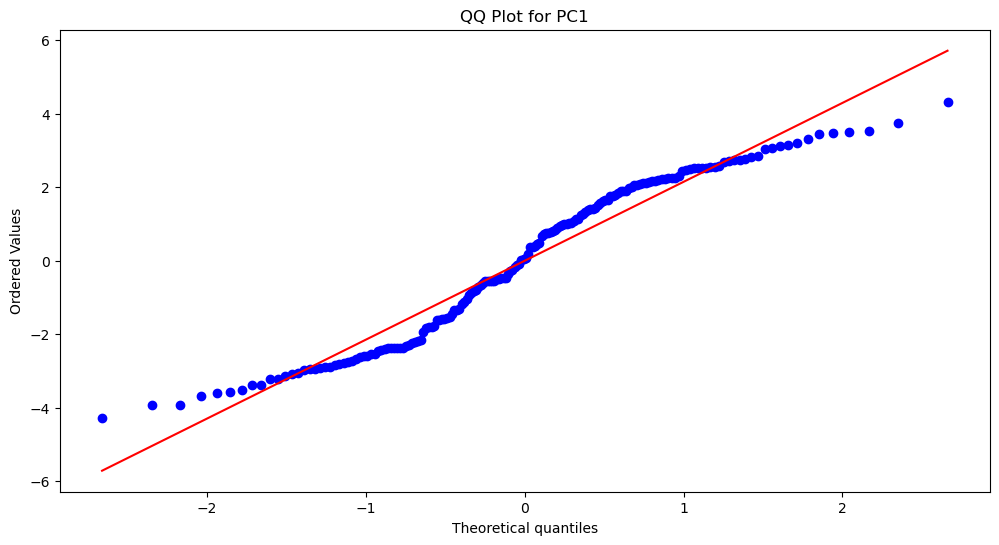

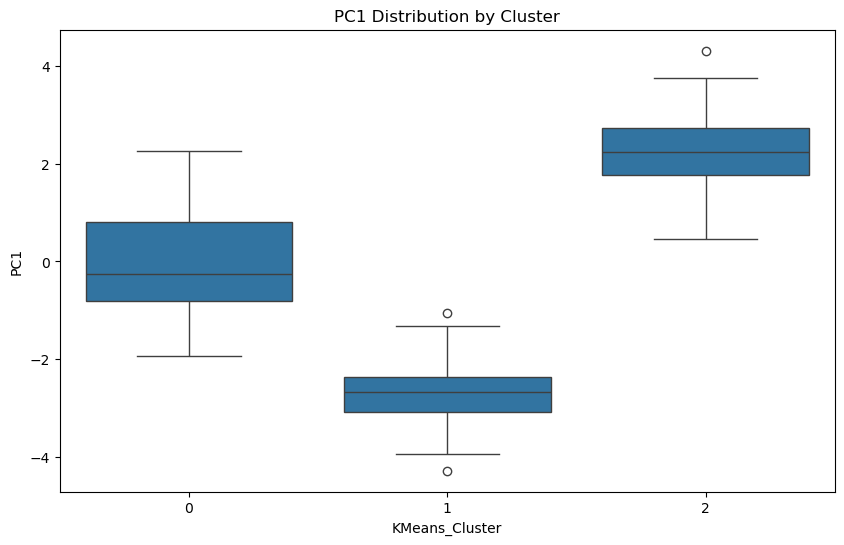

In [16]:
# Check for multivariate normality (QQ plots)
from scipy import stats

plt.figure(figsize=(12,6))
stats.probplot(pca_df['PC1'].values, dist="norm", plot=plt)
plt.title('QQ Plot for PC1')
plt.savefig('QQ_Plot_for_PC1.png', dpi=300, bbox_inches = 'tight')
plt.show()

# Check for equal variance (boxplot of PC scores by cluster)
plt.figure(figsize=(10,6))
sns.boxplot(x='KMeans_Cluster', y='PC1', data=pca_df)
plt.title('PC1 Distribution by Cluster')
plt.savefig('PC1_Distribution_by_Cluster.png', dpi=300, bbox_inches = 'tight')
plt.show()

# 1. This is a QQ (Quantile-Quantile) plot for PC1 (Principal Component 1). 
It helps assess whether the data follows a normal distribution by comparing theoretical quantiles (x-axis) with observed values (y-axis).

### Results
1.  Blue dots represent the actual data points.
2. The red line (y = x) is the reference for a perfectly normal distribution.
3. If the data follows a normal distribution, the points should closely follow the red line.
4. The deviations at the tails suggest that PC1 may not fully adhere to normality.
5. 
 ### Conclusions:
Given that normality is often an assumption in statistical analyses and modeling, this plot is useful for determining whether transformations or alternative approaches might be needed.
Nevertheless PCA is most  useful for dimensionality reduction, normality is less critical for PCA if the goal is dimensionality reduction versus statistical inference.

# 2. PC1 distribution by cluster results on assumptions
This plot helps evaluate how well PC1 differentiates the clusters and whether any extreme values exist. The purpose is to assess the distribution of the first principal component (PC1) across clusters from K-means.
This is a box plot visualizing the distribution of PC1 (Principal Component 1) values across three different KMeans clusters (0, 1, and 2). It provides insights into how PC1 varies within each cluster.

### Results
1. The y-axis represents the PC1 values, ranging from approximately -4 to 4.
2. The x-axis represents the three clusters assigned by KMeans.
3. Each box captures the interquartile range (IQR) which is the he middle 50% of the data.
4. The whiskers show the range of most data points, while dots outside them indicate outliers.

### Key observations:
1. Cluster 0 has a median PC1 value near 0, with a tight distribution, meaning the data is centered around a narrow range.
2. Cluster 1 has a slightly lower median than Cluster 0 and shows two significant outliers (one below -4 and one above -2).
3. Cluster 2 is visibly shifted higher in PC1, suggesting that this cluster is distinctly separated along this principal component.